# Objectives

- Assess the performance of machine learning models

- Diagnose the common problems in machine learning algorithms 

- Evaluate the predictive models using the different performance metrics


In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                 header=None, index_col=0)

In [7]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
target = df[1]

In [9]:
target.value_counts()

B    357
M    212
Name: 1, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

Take the independent variables as X and the column 1 as dependent variable. Use LabelEncoder for converting labels into integers.

In [12]:
# the 2: is column name 2, not position since .loc is used. 
X = df.loc[:,2:].values
y = df.loc[:, 1].values
le = LabelEncoder() # instantiate LabelEncoder 
y = le.fit_transform(y) # Fit le object and then transform labels to integers 
print(' Actual y labels: {}\n'.format(df.loc[:, 1].values[:5]),
      'Transformed y values: {}\n'.format(y[:5]),
      'All labels available in the data {}'.format(le.classes_))

 Actual y labels: ['M' 'M' 'M' 'M' 'M']
 Transformed y values: [1 1 1 1 1]
 All labels available in the data ['B' 'M']


In [ ]:
# This is the same as, LabelEncoder just allows us to put it in a pipeline. 
df[1].map({'M':1, 'B':0})

In [13]:
import numpy as np
print(np.unique(y, return_counts = True)) # number of 1's and 0's after transformation
print(np.unique(df.loc[:, 1], return_counts = True)) # Counts for each label in the original data

(array([0, 1]), array([357, 212]))
(array(['B', 'M'], dtype=object), array([357, 212]))


In [14]:
y.mean()

0.37258347978910367

__Train test split__

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

__Pipelines: Transformers and Estimators__ 

In [63]:
# preprocessing tools
from sklearn.preprocessing import StandardScaler # for scaling the features
from sklearn.preprocessing import PolynomialFeatures # for checking interaction effect between features

## models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
    
# for pipelines
from sklearn.pipeline import make_pipeline

In [64]:
## Let's start with Logistic Regression'

log_pipe = make_pipeline(StandardScaler(), # if we want to use regularization we need scaler 
                         PolynomialFeatures(degree=2, interaction_only= True), # we will only check the interactions, 
                         LogisticRegression(random_state = 1, solver = 'lbfgs'))

## Without further ado check the baseline

log_pipe.fit(X_train, y_train) # pipe behaves like sklearn estimator.

y_pred = log_pipe.predict(X_train) # predictions of vanilla log_reg model.

log_pipe.score(X_train, y_train) # score looks pretty impressive can we expect similar performance on the test?

0.9976525821596244

__An overview look for the pipelines__

<img src='img/pipelines.png' width = 450/>

[Source: Python Machine Learning](https://www.amazon.com/dp/1789955750?tag=duckduckgo-ffab-20&linkCode=osi&th=1&psc=1)

__Cross validation with pipelines__

__Holdout Cross_Validation__
<img src= 'img/cross_validation.png' width = 450/>

__Kfold Cross_Validation__

<img src = 'img/kfold_cross.png' width= 450/>

__Understanding Over or Underfitting__

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import validation_curve

parameters = [0.01, 0.1, 1, 10, 100] # we will be checking the regularization parameter in Log_reg

# we could do the same thing with

parameters = np.logspace(-3,2,5)

np.set_printoptions(suppress= True)

parameters

Now let's see how the train and validation scores are changing as we change C - Values:

In [ ]:
train_scores, test_scores = validation_curve(estimator=log_pipe,
                                             X=X_train,
                                             y=y_train,
                                             # this is the way for accessing a parameter of a
                                             param_name='logisticregression__C',
                                             # transformer within pipeline
                                             param_range=parameters,
                                             cv=10,  # note that this can take too long if your data is big
                                             verbose=1,  # algorithms will update us about the progress
                                             n_jobs=-1  # we will be using the other processing units in parallel
                                             )

Now we can simply plot the results

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(parameters, train_scores.mean(axis= 1), label = 'train')
plt.xscale('log')
plt.plot(parameters, test_scores.mean(axis = 1), label = 'test')
plt.legend()
plt.tight_layout()


__Fine-Tuning ML models via gridsearch__

GridSearch approach is very straight forward.

__Step1:__ Decide an estimator to use.

Suppose we would like to use a decision_tree classifier.

__Step2:__ Create a parameter grid

Suppose for the decision trees we would like to find best values for: 

max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

and 

max_features = ['auto', 'sqrt', 'log2', 25]

param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
              'max_features': ['auto', 'sqrt', 'log2', 25]
              }
              
__Step3:__ Instantiate GridSearchCV with these parameters.

__Step4:__ Fit gridsearchcv object.


In [18]:
from sklearn.model_selection import GridSearchCV

In [56]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=1)

max_depth_params = range(2, 12)  # values between 2 to 11 total: 10 values

max_features_param = [None, 'sqrt', 'log2', 1, 5]  # total of 4 values

# the names of the params in '' has to be exactly the same as in classifier features.
param_grid = {'max_depth': max_depth_params,
              'max_features': max_features_param}

gridsearch = GridSearchCV(estimator=tree_clf,
                          param_grid=param_grid,
                          n_jobs=-1,  # paralllel computation
                          verbose=1,  # gives feedback
                          cv=5,  # cross-validate, default 5
                          scoring='roc_auc',  # you can use multiple scoring too, default is accuracy
                          return_train_score=True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.6s finished


Here we have 50 different candidates (classifier), and each is trained on 5 folds. So 250 trees were built.

In [24]:
gridsearch.best_params_

{'max_depth': 6, 'max_features': 'log2'}

In [57]:
print(gridsearch.best_score_) # note if you use multiple this doesn't work
print(gridsearch.best_estimator_) # doesn't work for multiple scoring

0.9759062366154956
DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=10,
                       random_state=1)


In [32]:
# Try GridSearch on Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

In [43]:
# parameter grid
param_grid = {'penalty': ['l1','l2', 'elasticnet', None],
              'C': np.logspace(start=5, stop=14, base=10, num=10)} # gives me numbers starting from 10
 

In [45]:
np.logspace(start=-2, stop=7, base=10, num=10)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07])

In [46]:
gridsearch_lr = GridSearchCV(lr_clf, param_grid, cv=5, n_jobs=-1)

In [47]:
gridsearch_lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10, 1.e+11, 1.e+12,
       1.e+13, 1.e+14]),
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [48]:
gridsearch_lr.best_params_

{'C': 10000000000.0, 'penalty': 'l2'}

In [ ]:
# We get the same result every time because there's no randomness to logistic regression! 
# same for kNN
# It's a stochastic model, and won't be flaky due to random state. 

going back to the decision tree's gridsearch:

In [49]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00480213, 0.00334206, 0.00196843, 0.00153599, 0.00173268,
        0.00456839, 0.00189342, 0.00150919, 0.00126443, 0.00172014,
        0.00603695, 0.00183091, 0.00184875, 0.00116668, 0.00184889,
        0.00502667, 0.00153618, 0.00172253, 0.00120521, 0.00172858,
        0.00564232, 0.00172324, 0.00172968, 0.00122623, 0.00188966,
        0.00508895, 0.00174112, 0.00190663, 0.0012506 , 0.00179448,
        0.00553713, 0.00216475, 0.00188065, 0.00127358, 0.0020535 ,
        0.00574322, 0.00193729, 0.00218258, 0.00128798, 0.00184383,
        0.00580072, 0.00207205, 0.00182157, 0.0016026 , 0.00214925,
        0.00580583, 0.00195966, 0.00150456, 0.00135183, 0.00175071]),
 'std_fit_time': array([1.78436530e-03, 2.85138974e-03, 2.99834560e-04, 1.25353007e-04,
        1.41047319e-04, 7.41026116e-05, 5.07484721e-04, 1.47154991e-04,
        1.66845901e-04, 1.70949307e-04, 1.59698491e-03, 1.23416529e-04,
        2.50181030e-04, 1.92591842e-04, 1.21806874e-04, 4.90134757e-0

In [58]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)

In [59]:
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004723,0.000188,0.002889,0.000146,2,None,"{'max_depth': 2, 'max_features': None}",0.936632,0.954304,0.920991,...,0.940972,0.011767,34,0.969558,0.979542,0.971797,0.968099,0.955344,0.968868,0.007829
1,0.003751,0.001705,0.003469,0.001379,2,sqrt,"{'max_depth': 2, 'max_features': 'sqrt'}",0.922454,0.945460,0.901238,...,0.932843,0.019152,49,0.954512,0.956178,0.959250,0.956950,0.947330,0.954844,0.004055
2,0.002247,0.000620,0.002686,0.000719,2,log2,"{'max_depth': 2, 'max_features': 'log2'}",0.949074,0.966686,0.919517,...,0.958329,0.022145,29,0.966397,0.957576,0.972680,0.959692,0.957930,0.962855,0.005852
3,0.001537,0.000082,0.003225,0.001607,2,1,"{'max_depth': 2, 'max_features': 1}",0.949074,0.973172,0.925708,...,0.960632,0.020436,28,0.966896,0.961311,0.974428,0.961789,0.961011,0.965087,0.005143
4,0.003522,0.002707,0.006134,0.004424,2,5,"{'max_depth': 2, 'max_features': 5}",0.922454,0.945460,0.901238,...,0.932843,0.019152,49,0.954512,0.956178,0.959250,0.956950,0.947330,0.954844,0.004055


In [60]:
columns = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

In [61]:
# Recall that gridsearch.best_estimator is an decisiontreeclassifier object
# so score returns 'accuracy' by default
gridsearch.best_estimator_.score(X_train, y_train)

0.9553990610328639

In [62]:
cv_results_df[columns].sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
22,"{'max_depth': 6, 'max_features': 'log2'}",0.975906,0.018972,1,0.991218,0.001770
37,"{'max_depth': 9, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
27,"{'max_depth': 7, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
32,"{'max_depth': 8, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
42,"{'max_depth': 10, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
47,"{'max_depth': 11, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
17,"{'max_depth': 5, 'max_features': 'log2'}",0.974831,0.018115,7,0.990312,0.003337
28,"{'max_depth': 7, 'max_features': 1}",0.974263,0.017295,8,0.990362,0.001327
48,"{'max_depth': 11, 'max_features': 1}",0.974263,0.017295,8,0.990362,0.001327
43,"{'max_depth': 10, 'max_features': 1}",0.974263,0.017295,8,0.990362,0.001327


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

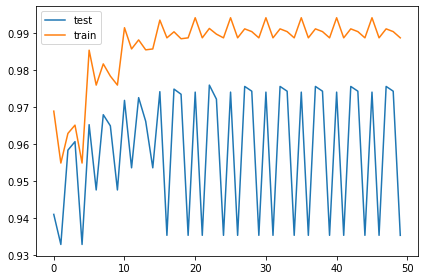

In [54]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(50), roc_test_scores, label = 'test')
plt.plot(range(50), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

# df above shows the best test score is by model 22

We can also use pipelines with GridSearchCV. 

In [65]:
log_pipe
# we can now treat log_pipe as estimator. 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [66]:
# Problem: params are buried in this pipeline. Use 'dunder' to access the parameters: 

param_grid = {'logisticregression__C': np.logspace(-3, 2, 10),  
              'polynomialfeatures__interaction_only': [True, False]}


gridsearch = GridSearchCV(estimator = log_pipe, 
                          param_grid = param_grid, # now param_grid changes feature sin both logreg and polynomial features.
                          n_jobs = -1, 
                          verbose = 1,
                          cv = 10, 
                          scoring = 'roc_auc', 
                          return_train_score= True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


10 features for C, and 2 features for PolynomialFeatures. 
Each is cross-validated 10 times, giving me 200 models in total. 

In [67]:
## let's see best score and best parameters

gridsearch.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('logisticregression',
                 LogisticRegression(C=0.1668100537200059, random_state=1))])

In [68]:
gridsearch.best_score_

0.9927884615384615

In [69]:
gridsearch.cv_results_

{'mean_fit_time': array([0.23314476, 0.033391  , 0.03565662, 0.03708072, 0.04108763,
        0.04397817, 0.0516525 , 0.0601299 , 0.08966694, 0.10501003,
        0.16284707, 0.20552266, 0.23399892, 0.18854856, 0.14775465,
        0.13321748, 0.14389296, 0.14006033, 0.13246207, 0.10249004]),
 'std_fit_time': array([0.10569658, 0.00282959, 0.0025174 , 0.00306224, 0.00278363,
        0.00656174, 0.00571835, 0.01005623, 0.03044763, 0.03371277,
        0.04237091, 0.0259248 , 0.04434956, 0.07648705, 0.0500177 ,
        0.01682935, 0.01747918, 0.01850265, 0.03016288, 0.02870554]),
 'mean_score_time': array([0.00366855, 0.00416646, 0.00397916, 0.00381827, 0.00386271,
        0.00374758, 0.00514612, 0.00449693, 0.00551407, 0.00825512,
        0.00739281, 0.01101055, 0.01018538, 0.00775592, 0.00476556,
        0.00565722, 0.00584295, 0.00436702, 0.00425682, 0.00377128]),
 'std_score_time': array([0.00031043, 0.00090315, 0.00067975, 0.00093948, 0.00038716,
        0.00022721, 0.00211803, 0.001763

In [71]:
colums = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

log_reg_results = pd.DataFrame(gridsearch.cv_results_)[colums]
log_reg_results.sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
8,"{'logisticregression__C': 0.1668100537200059, ...",0.992788,0.009508,1,0.999817,0.000071
6,{'logisticregression__C': 0.046415888336127795...,0.992575,0.010337,2,0.999195,0.000225
7,{'logisticregression__C': 0.046415888336127795...,0.992121,0.011486,3,0.999294,0.000217
9,"{'logisticregression__C': 0.1668100537200059, ...",0.992112,0.011341,4,0.999843,0.000073
5,"{'logisticregression__C': 0.01291549665014884,...",0.991417,0.012198,5,0.997869,0.000452
4,"{'logisticregression__C': 0.01291549665014884,...",0.991400,0.011428,6,0.997796,0.000472
11,"{'logisticregression__C': 0.5994842503189409, ...",0.991150,0.011069,7,1.000000,0.000000
10,"{'logisticregression__C': 0.5994842503189409, ...",0.991124,0.010840,8,1.000000,0.000000
12,"{'logisticregression__C': 2.1544346900318843, ...",0.990162,0.011817,9,1.000000,0.000000
13,"{'logisticregression__C': 2.1544346900318843, ...",0.989948,0.012203,10,1.000000,0.000000


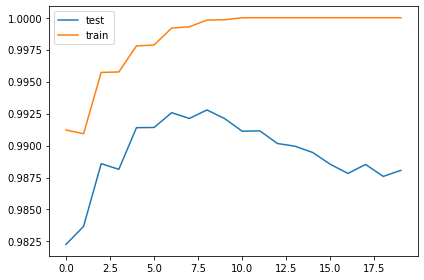

In [74]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(20), roc_test_scores, label = 'test')
plt.plot(range(20), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

# can use this graph to pick the model with highest test score.

Now cross validate using the best estimator.

In [75]:
from sklearn.model_selection import cross_val_score

In [ ]:
gs = GridSearchCV(estimator= log_pipe, param_grid = param_grid, scoring = 'roc_auc', cv = 2 )

scores = cross_val_score(gs, X_train, y_train, scoring = 'roc_auc', cv = 5)

print('CV accuracy: %.3f +/- %.3f'%(np.mean(scores), np.std(scores)))

In [76]:
y_test_pred = gridsearch.best_estimator_.predict_proba(X_test)[:, 1]

In [77]:
y_test_pred[:5]

array([2.68780962e-02, 2.03205286e-02, 1.00000000e+00, 4.27869365e-03,
       7.01409091e-04])

In [78]:
from sklearn.metrics import roc_auc_score

In [79]:
roc_auc_score(y_test, y_test_pred)

0.9926624737945493

## Extras

[Faster Hyperparameter tuning: Randomized Approach](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[Learning the hyperparameter space](https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a)

[Using sklearn for plotting learning curves](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

[YellowBrick Validation Curve](https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html)